In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [46]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('Picture')

    # Now perform the following 100 times:
    for img_i in range(1, 50):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i
        print(f)

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('Picture', f))
except:
    #os.rm('Picture)
    print("You may need to delete the existing 'Picture' folder in your directory")

You may need to delete the existing 'Picture' folder in your directory


In [47]:
files = os.listdir('Picture')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('Picture', files[0]))
plt.imread(os.path.join('Picture', files[0]))

files = [os.path.join('Picture', file_i)
 for file_i in os.listdir('Picture')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[99])

print(img)

Picture\pictures -001.jpg
[[[34 45 49]
  [34 45 49]
  [34 43 48]
  ...
  [26 31 27]
  [40 42 41]
  [39 41 40]]

 [[32 43 47]
  [32 43 47]
  [32 41 46]
  ...
  [21 26 22]
  [35 37 36]
  [34 36 35]]

 [[29 40 46]
  [29 40 46]
  [29 38 45]
  ...
  [20 25 21]
  [32 34 33]
  [29 31 30]]

 ...

 [[32 31 45]
  [38 37 51]
  [40 39 53]
  ...
  [43 41 42]
  [41 41 41]
  [40 40 38]]

 [[28 25 42]
  [33 32 46]
  [36 35 49]
  ...
  [35 35 35]
  [35 33 34]
  [32 30 31]]

 [[27 24 41]
  [33 30 47]
  [35 34 48]
  ...
  [31 31 33]
  [31 29 30]
  [29 27 28]]]


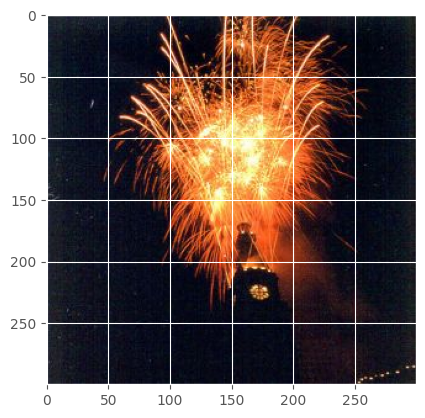

In [48]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

In [49]:
img.shape
# (218, 178, 3)

(300, 300, 3)

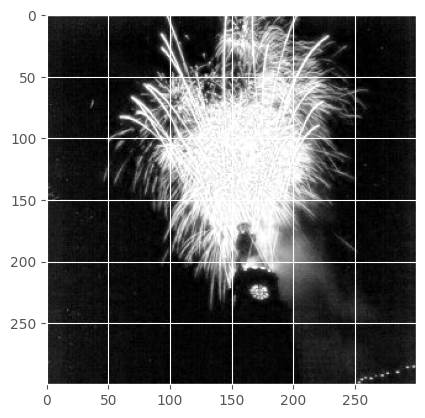

In [50]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel

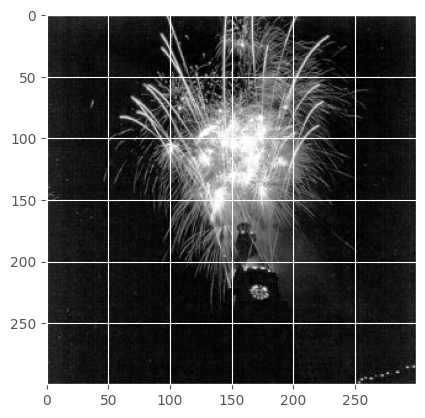

In [51]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

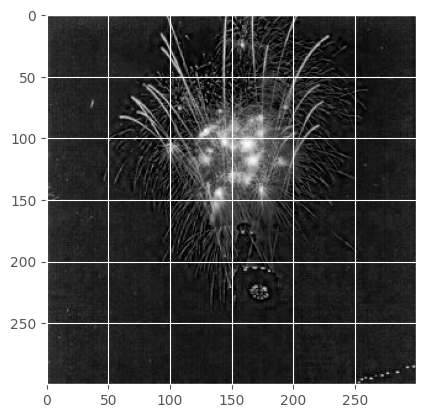

In [52]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel

In [53]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]

#imgs = utils.get_celeb_imgs() # nope nope nope

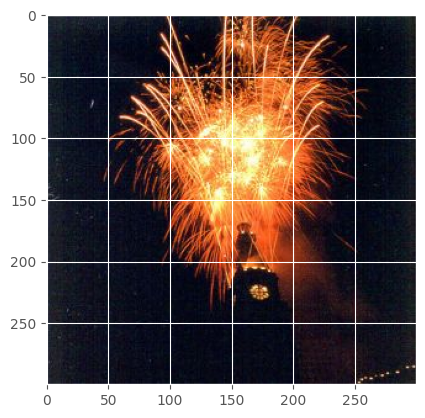

In [54]:
plt.imshow(imgs[99])

In [55]:
imgs[0].shape

(300, 300, 3)

In [56]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(100, 300, 300, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


look at this average person


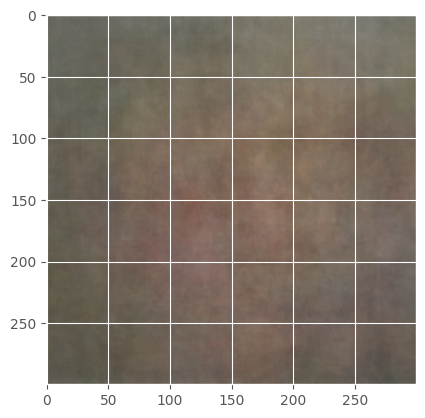

In [57]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img.astype(np.uint8))
print("look at this average person")

This is the standard deviation - the variance of the mean


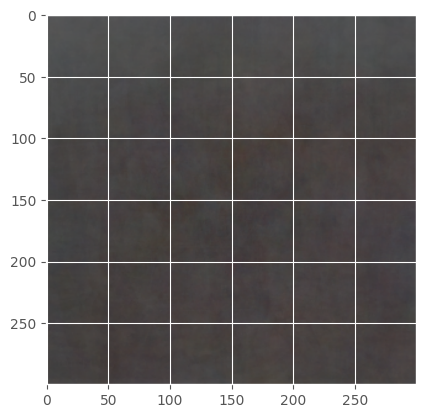

In [58]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))
print("This is the standard deviation - the variance of the mean")

Mean of all colour channels


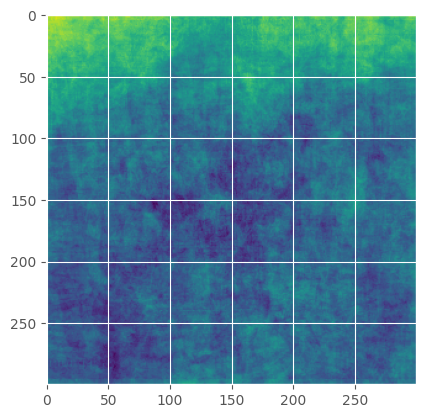

In [59]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8)) # Mean of all colour channels
print("Mean of all colour channels")

In [60]:
flattened = data.ravel()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
print(data[:1])
print(flattened[:10])

[[[[ 0  8 10]
   [ 0  3  7]
   [11  8 15]
   ...
   [ 4  5 10]
   [ 2  8  6]
   [37 48 40]]

  [[ 0  6  8]
   [ 0  2  6]
   [ 9  6 13]
   ...
   [ 4  5 10]
   [ 0  9  6]
   [37 48 40]]

  [[ 0  6  8]
   [ 1  5  8]
   [ 9  7 12]
   ...
   [ 4  5 10]
   [ 0  9  6]
   [37 48 40]]

  ...

  [[ 0  6  0]
   [ 4  6  3]
   [10  5  9]
   ...
   [ 2  6  7]
   [ 9  5  4]
   [48 43 39]]

  [[ 0  6  0]
   [ 4  6  3]
   [10  5  9]
   ...
   [ 2  6  7]
   [ 9  5  4]
   [48 43 39]]

  [[ 0  6  0]
   [ 4  6  3]
   [10  5  9]
   ...
   [ 2  6  7]
   [ 9  5  4]
   [48 43 39]]]]
[ 0  8 10  0  3  7 11  8 15 11]


(array([298865., 132300., 133183., 146970., 146017., 144017., 147806.,
        150895., 162656., 160708., 147250., 146128., 150601., 149508.,
        152238., 155287., 158103., 162470., 166736., 167981., 172220.,
        177492., 181009., 185028., 185515., 186375., 185715., 180821.,
        180715., 180698., 178268., 177330., 174275., 169010., 164382.,
        161870., 159088., 155654., 151224., 144853., 143178., 142545.,
        141498., 141096., 139755., 140174., 141530., 139519., 137130.,
        136792., 134440., 136869., 137647., 136751., 136595., 133458.,
        139120., 141050., 135021., 131716., 125661., 125992., 127505.,
        126077., 122959., 118737., 117388., 115688., 114549., 113630.,
        114257., 113792., 112810., 111887., 111698., 111186., 111328.,
        110888., 110566., 110774., 111073., 111286., 110452., 111198.,
        110125., 109826., 109192., 109168., 108936., 109200., 110106.,
        111488., 111111., 112383., 113035., 113897., 113712., 113657.,
      

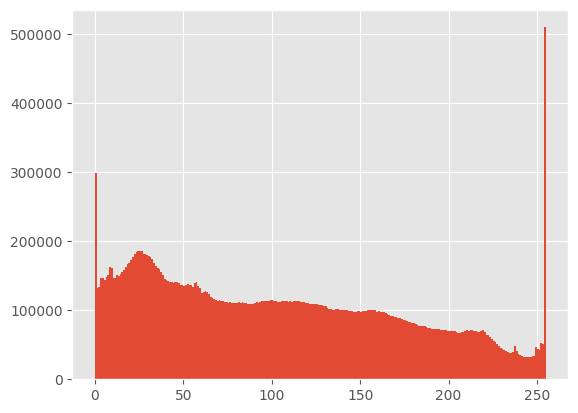

In [61]:
plt.hist(flattened.ravel(), 255)

(array([4.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 6.000e+00,
        8.000e+00, 1.300e+01, 2.000e+01, 2.500e+01, 3.000e+01, 2.900e+01,
        4.800e+01, 6.000e+01, 7.700e+01, 1.040e+02, 1.070e+02, 1.310e+02,
        1.600e+02, 1.830e+02, 1.870e+02, 2.570e+02, 2.650e+02, 2.480e+02,
        3.120e+02, 3.140e+02, 3.270e+02, 3.330e+02, 3.580e+02, 3.800e+02,
        3.730e+02, 4.050e+02, 4.050e+02, 3.900e+02, 4.400e+02, 4.110e+02,
        4.760e+02, 5.580e+02, 5.220e+02, 6.470e+02, 6.850e+02, 7.170e+02,
        7.050e+02, 7.500e+02, 8.030e+02, 8.480e+02, 8.240e+02, 8.350e+02,
        9.600e+02, 9.580e+02, 9.560e+02, 1.146e+03, 1.098e+03, 1.163e+03,
        1.214e+03, 1.301e+03, 1.316e+03, 1.486e+03, 1.550e+03, 1.672e+03,
        1.729e+03, 1.810e+03, 1.780e+03, 1.977e+03, 1.973e+03, 2.051e+03,
        2.126e+03, 2.093e+03, 2.269e+03, 2.249e+03, 2.270e+03, 2.255e+03,
        2.426e+03, 2.427e+03, 2.403e+03, 2.478e+03, 2.464e+03, 2.504e+03,
        2.493e+03, 2.485e+03, 2.428e+0

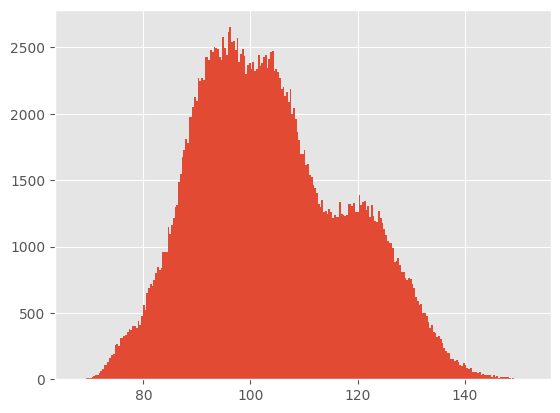

In [62]:
plt.hist(mean_img.ravel(), 255)

Text(0.5, 1.0, '(img - mean) distribution')

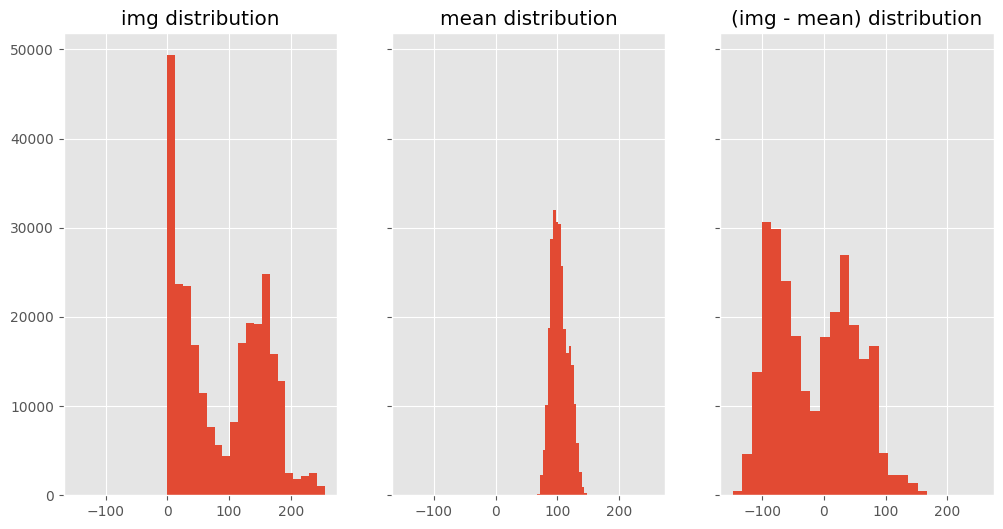

In [63]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

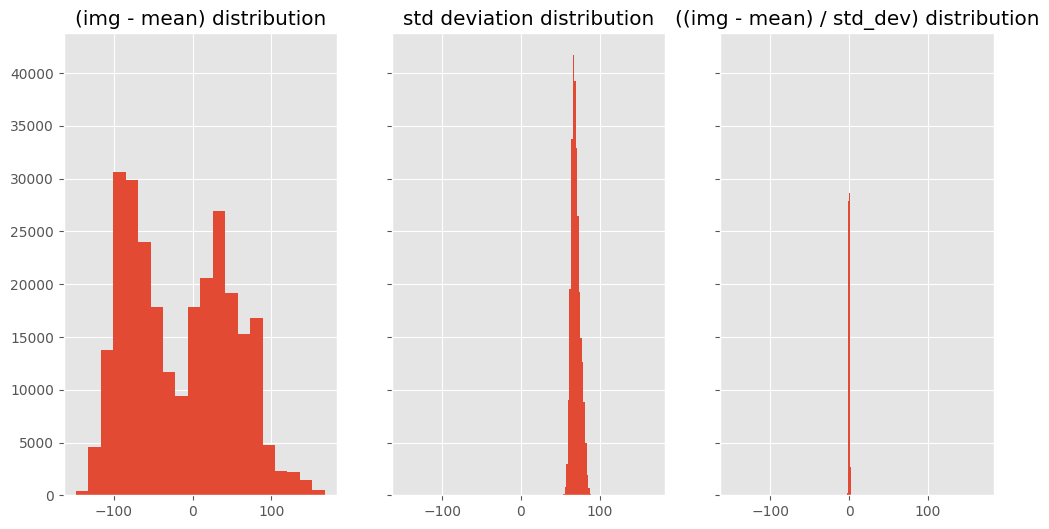

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

In [65]:
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

(-5.0, 5.0)

In [66]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [67]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [68]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("linspace_1/Slice:0", shape=(100,), dtype=float32)


In [69]:
g = tf.get_default_graph()

In [70]:
[op.name for op in g.get_operations()]

['linspace/start',
 'linspace/stop',
 'linspace/num',
 'linspace/Cast',
 'linspace/Cast_1',
 'linspace/Shape',
 'linspace/Shape_1',
 'linspace/BroadcastArgs',
 'linspace/BroadcastTo',
 'linspace/BroadcastTo_1',
 'linspace/ExpandDims/dim',
 'linspace/ExpandDims',
 'linspace/ExpandDims_1/dim',
 'linspace/ExpandDims_1',
 'linspace/Shape_2',
 'linspace/Shape_3',
 'linspace/strided_slice/stack',
 'linspace/strided_slice/stack_1',
 'linspace/strided_slice/stack_2',
 'linspace/strided_slice',
 'linspace/add/y',
 'linspace/add',
 'linspace/SelectV2/condition',
 'linspace/SelectV2/t',
 'linspace/SelectV2',
 'linspace/sub/y',
 'linspace/sub',
 'linspace/Maximum/y',
 'linspace/Maximum',
 'linspace/sub_1/y',
 'linspace/sub_1',
 'linspace/Maximum_1/y',
 'linspace/Maximum_1',
 'linspace/sub_2',
 'linspace/Cast_2',
 'linspace/truediv',
 'linspace/GreaterEqual/y',
 'linspace/GreaterEqual',
 'linspace/SelectV2_1/e',
 'linspace/SelectV2_1',
 'linspace/range/start',
 'linspace/range/delta',
 'linspace/ra

In [71]:
g.get_tensor_by_name('linspace/Slice' + ':0')

<tf.Tensor 'linspace/Slice:0' shape=(100,) dtype=float32>

In [72]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.6969695  -0.6363635  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.151515
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.2727275   0.3333335   0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.757576    0.818182    0.878788    0.939394
  1.          1.060606    1.121212    1.1818185   1.2424245   1.3030305
  1.3636365   1.4242425   1.4848485   1.5454545   1.606061    1.666667
  1.727273    1.787879    1.848485    1.909091    1.969697    2.0

In [73]:
sess = tf.Session(graph=g)
sess.close()

In [74]:
g2 = tf.Graph()

In [75]:
sess = tf.InteractiveSession()
x.eval()

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


array([-3.        , -2.939394  , -2.878788  , -2.8181818 , -2.7575758 ,
       -2.6969697 , -2.6363635 , -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.3333333 , -2.2727273 , -2.2121212 , -2.151515  ,
       -2.090909  , -2.030303  , -1.969697  , -1.9090909 , -1.8484848 ,
       -1.7878788 , -1.7272727 , -1.6666666 , -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.4242424 , -1.3636363 , -1.3030303 , -1.2424242 ,
       -1.1818181 , -1.121212  , -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.6969695 , -0.6363635 ,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.151515  , -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.2727275 ,
        0.3333335 ,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.757576  ,  0.818182  ,  0.878788  ,
        0.939394  ,  1.        ,  1.060606  ,  1.121212  ,  1.18

In [76]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


In [77]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

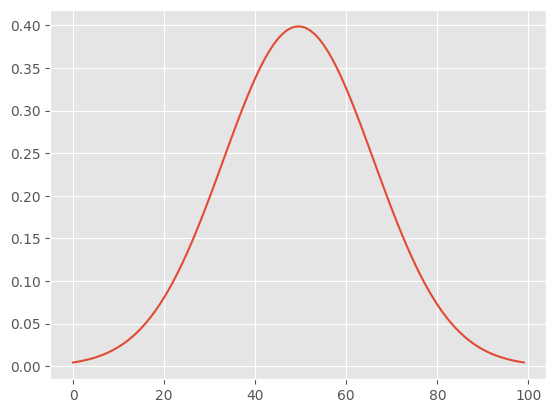

In [78]:
res = z.eval()
plt.plot(res)
# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
#%matplotlib inline
#plt.plot(res)

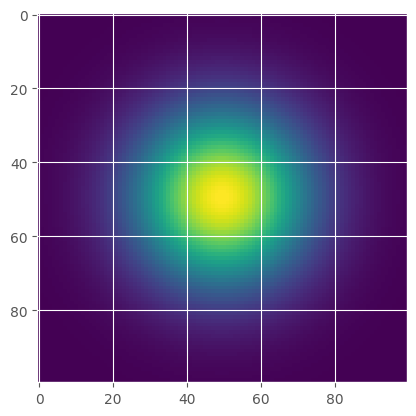

In [79]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())